# Import Library

In [114]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Uploading Csv file

In [115]:
netflix_data = pd.read_csv('netflix_titles.csv')

In [116]:
netflix_data 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [117]:
# Description of data

netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [118]:
# Information of Data

netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Data Preprocessing
.head()

In [119]:
netflix_data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [120]:
pd.isnull(netflix_data)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [121]:
# checking number of null values

pd.isnull(netflix_data).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# The mentioned columns have the following counts of null values:

Director: 2634 null values
Cast: 825 null values
Country: 831 null values
Date Added: 10 null values
Rating: 4 null values
Duration : 3 null values

# .shape
It show the total no of rows & Column in the dataset

In [122]:
netflix_data.shape

(8807, 12)

# .dtypes
This Attribute show the data type of each column

In [123]:
netflix_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [124]:
netflix_data.isnull().sum().sum()

4307

 In the dataset, there are a total of 5332 null values across all columns.

In [125]:
# Dealing with null values in the "Director" column

netflix_data.director

0       Kirsten Johnson
1                   NaN
2       Julien Leclercq
3                   NaN
4                   NaN
             ...       
8802      David Fincher
8803                NaN
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [126]:
netflix_data.director = netflix_data.director.fillna("Unknown")

In [127]:
netflix_data.director.isnull().sum()

0

In [128]:
netflix_data.cast =netflix_data.cast.fillna('not listed')

In [129]:
netflix_data.cast.isnull().sum()

0

In [130]:
netflix_data.country = netflix_data.country.fillna("unknown")

In [131]:
netflix_data.country.isnull().sum()

0

In [132]:
netflix_data.date_added = netflix_data.date_added.fillna("unknown")

In [133]:
netflix_data.date_added.isnull().sum()

0

In [134]:
netflix_data.rating = netflix_data.rating.fillna('not listed')

In [135]:
netflix_data.rating.isnull().sum()

0

In [136]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,not listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,not listed,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,not listed,unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


<Axes: >

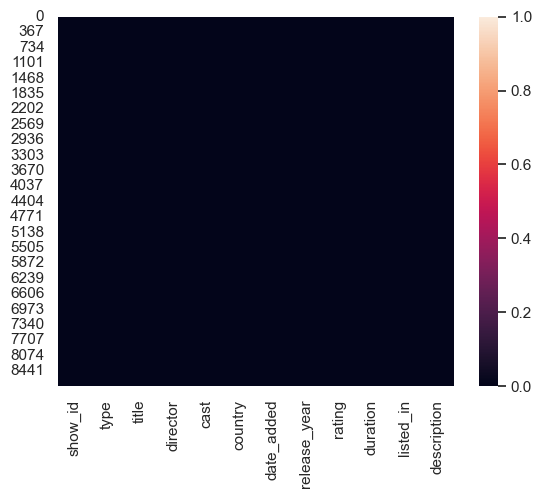

In [137]:
sns.heatmap(netflix_data.isnull())

In [142]:
netflix_data[netflix_data.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [143]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,not listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,not listed,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,not listed,unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [144]:
netflix_data.date_added

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [146]:
netflix_data.dropna(inplace=True)

In [148]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [150]:
netflix_data= netflix_data.rename(columns={'listed_in':'Genre'})

In [151]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,not listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,not listed,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,not listed,unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [154]:
# We are saving the DataFrame as a new CSV file with an extended name denoting clean data

netflix_data.to_csv('netflix_data_cleandata.csv')

# We are in the process of changing the data type of the "date_added" column from object to datetime to facilitate future analysis.

In [155]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], format='%B %d, %Y', errors='coerce')


In [156]:
netflix_data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
Genre                   object
description             object
dtype: object

In [157]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,not listed,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,not listed,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,not listed,unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Exploratory Data Analysis: Visualization, Observations, and Insights

In [158]:
netflix_data.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'Genre', 'description'],
      dtype='object')

In [159]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,not listed,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,not listed,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,not listed,unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


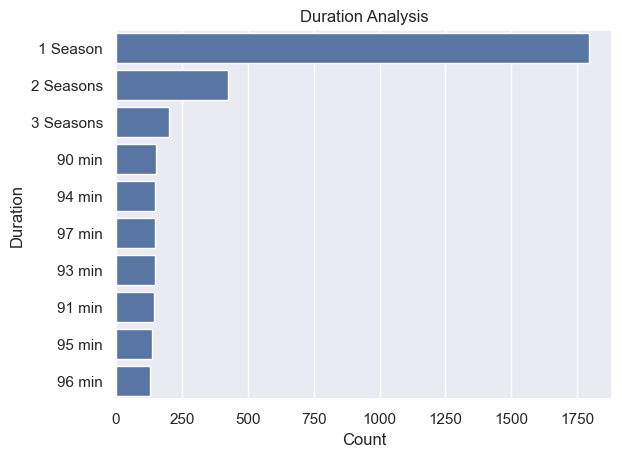

In [160]:
sns.barplot(y=netflix_data.duration.value_counts().head(10).index, x=netflix_data.duration.value_counts().head(10).values)
plt.title('Duration Analysis')
plt.xlabel('Count')
plt.ylabel('Duration')
plt.show()


# Analysis of Duration

In the dataset analyzed, the season with the most value counts is Season 1, appearing in shows. This suggests that among the TV shows included in the dataset, the majority of them have only one season.

<Axes: ylabel='country'>

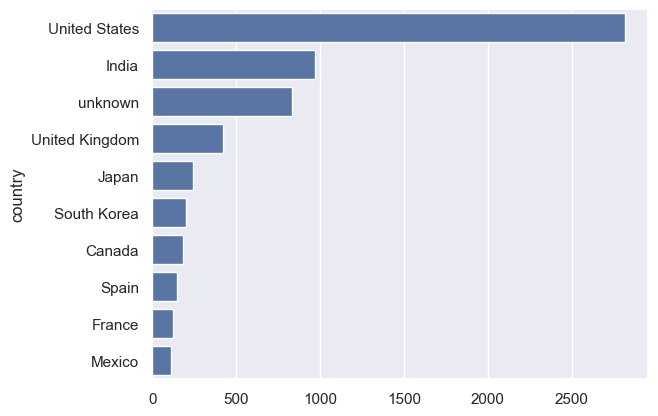

In [161]:
sns.barplot(y=netflix_data.country.value_counts().head(10).index, x=netflix_data.country.value_counts().head(10).values)


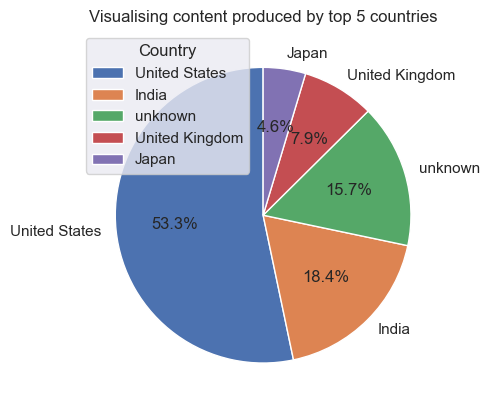

In [162]:
plt.pie(netflix_data.country.value_counts().head(5),labels=netflix_data.country.value_counts().head().index,startangle=90, autopct='%.1f%%')
plt.legend(loc='upper left', title="Country")
plt.title('Visualising content produced by top 5 countries')
plt.show()

# Analysis Summary: Most Content Created in the United States on Netflix

Upon examining the Netflix dataset, it is evident that a significant portion of the platform's content creation originates from the United States. This finding indicates a dominant presence of American-produced shows and movies within the Netflix library.Diverse Genres from the US: The content from the United States spans across various genres, including but not limited to drama, comedy, action & adventure, documentaries, etc. This diversity signifies the broad spectrum of American storytelling showcased on Netflix.

In [164]:
# top produced content

netflix_data.rating.value_counts().head(10)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

Text(0, 0.5, 'Counts')

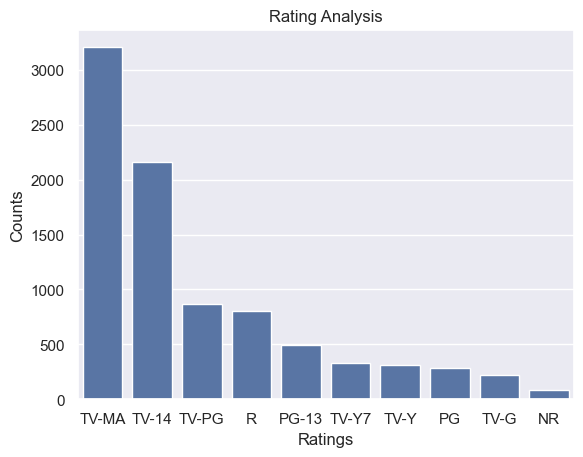

In [166]:
sns.barplot(y=netflix_data.rating.value_counts().head(10).values, x=netflix_data.rating.value_counts().head(10).index)
plt.title('Rating Analysis')
plt.xlabel('Ratings')
plt.ylabel('Counts')

# Analysis Summary: Top Rated Content on Netflix

The analysis of the Netflix database reveals compelling insights into the prevalence and characteristics of TV-MA rated content, denoting mature-themed shows and movies within the platform's library.

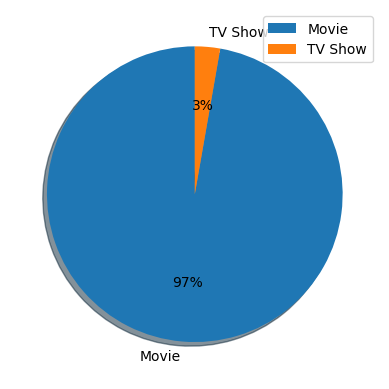

In [17]:
# Distribution of Movies and Tv shows on netflix

plt.pie(netflix_data.type.value_counts(),labels=netflix_data.type.value_counts().index,
       autopct='%1.f%%',shadow=True, startangle=90)
plt.legend()
plt.show()

# Analysis Summary: Top-Produced Content on Netflix - Movies and TV Shows
The analysis unmistakably demonstrates that movies constitute the majority of the content available on Netflix. This dominance suggests a strategic focus on acquiring and producing a wide array of films to cater to diverse viewer preferences
Netflix database analysis reveals a strategic focus on movies as the primary content category, complemented by a substantial collection of TV shows across diverse genres and formats.


In [179]:
netflix_data.Genre.value_counts()

Genre
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [187]:
# Top 10 Genres in india on netflix.
india_shows = netflix_data[netflix_data['country'] == 'India']
genre_counts = india_shows['Genre'].value_counts()
top_genres = genre_counts.head(10)
print("Top 10 popular genres in India on Netflix:")
print(top_genres)

Top 10 popular genres in India on Netflix:
Genre
Comedies, Dramas, International Movies              120
Dramas, International Movies                        118
Dramas, Independent Movies, International Movies    108
Dramas, International Movies, Romantic Movies        62
Action & Adventure, Dramas, International Movies     54
Dramas, International Movies, Thrillers              43
Comedies, International Movies, Romantic Movies      42
Comedies, International Movies, Music & Musicals     35
Dramas, International Movies, Music & Musicals       34
Comedies, Dramas, Independent Movies                 26
Name: count, dtype: int64


In [189]:
# TOP 10 Genre in United states on netlfix.
us_shows = netflix_data[netflix_data['country']=='United States']
genre_counts = us_shows['Genre'].value_counts()
top_genres = genre_counts.head(10)
print("top 10 popular Genre in United states on Netlflix:")
print(top_genres)

top 10 popular Genre in United states on Netlflix:
Genre
Documentaries                         249
Stand-Up Comedy                       209
Children & Family Movies, Comedies     90
Dramas                                 88
Comedies                               84
Children & Family Movies               80
Kids' TV                               77
Dramas, Independent Movies             74
Reality TV                             71
Action & Adventure                     64
Name: count, dtype: int64


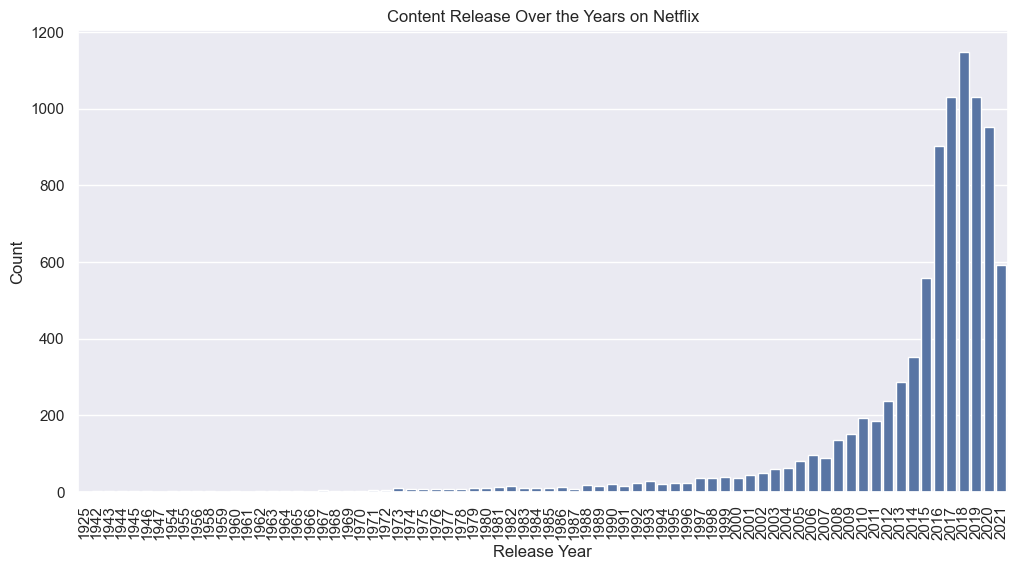

In [198]:
plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', data=netflix_data)

plt.title('Content Release Over the Years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

# Observations on Content Release Trend:

The line plot depicting content release trends over the years reveals several notable patterns:

1997 to 2014:

The trend exhibits a gradual increase in content counts from 1997 to 2014. During this period, there is a steady rise, suggesting a growing presence of content on Netflix.
2015:

A significant spike is observed in 2015, indicating a substantial increase in content releases. This could be attributed to various factors such as increased investment in original content, partnerships, or a strategic shift in Netflix's content strategy.
2016 to 2020:

Following the spike, the trend maintains a relatively high count from 2016 to 2020, reflecting sustained efforts in content production and expansion during this period.
2021:

The lower count in 2021 may be due to incomplete data collection rather than an actual decrease in content production. It is essential to consider data completeness when interpreting the count for the most recent year.
These observations provide insights into the evolution of Netflix's content library, highlighting key years of significant growth and potential shifts in content strategy. The substantial increase from 2015 onward indicates a dynamic period in Netflix's content production.

# Summary
Summary of Exploratory Data Analysis (EDA)
Dataset Overview: 

Columns Recap:
The dataset comprises various columns including 'show_id,' 'type,' 'title,' 'director,' 'cast,' 'country,' 'date_added,' 'release_year,' 'rating,' 'duration,' 'listed_in,' and 'description.'
Data Cleaning:
Handling Null Values:
Identified and addressed null values in columns such as 'director,' 'cast,' 'country,' 'date_added,' and 'rating.'
Imputed 'Unknown' for null values in the 'director' column.
Removed null rows in the 'date_added' column.
Content Distribution:
Geographical Insights:

Explored the distribution of content across different countries, revealing a dominance of the USA, followed by India and an 'Unknown' category.
Investigated potential reasons for a decline in movie production in the United Kingdom.
Found Potential countries which can contribute in future.
Global Genre Preferences:

Analyzed the distribution of content based on ratings, showcasing a strong demand for TV-MA and TV-14 content.
Examined content preferences in India, highlighting the popularity of TV-14 and TV-MA.
Time Trends:
Release Over Years:
Identified trends in content release over the years, observing a steady increase from 1997 to 2014, a spike in 2015, and sustained growth until 2020.
Acknowledged a potential data collection gap for the year 2021.
Duration Analysis:
Content Duration Trends:
Explored content duration, noting a prevalence of series (1 Season) and movies with durations around 1 hour 30 minutes to 2 hours.
Discussed potential reasons for the decline in series beyond Season 1.
Insights:
Viewer Preferences:

Signaled a preference for concise content, potentially reflecting modern viewers' time constraints.
Identified a strong demand for TV-MA and TV-14 content globally.
Market Opportunities:

Suggested opportunities for Netflix to cater to diverse markets, including the teenage audience in India and mature viewers globally.
Indicated potential business opportunities in regions with lower content production.
Recommendations:
Content Strategy:

Emphasized the need for a diverse content strategy, balancing series and movies.
Encouraged the exploration of regional content opportunities.
Targeted Productions:

Recommended targeted productions for specific age groups and demographics, aligning with global and regional preferences.
This EDA provides a comprehensive overview of the dataset, highlighting key trends, insights, and recommendations for strategic decision-making in content production and distribution on Netflix.